# Transformaciones

Los datos no siempre vienen en el formato deseado para hacer el entrenamiento, por lo que a la hora de crear el ``Dataset`` es necesario hacer unas transformaciones de estos

Cuando creamos el ``Dataset`` de forma personalizada podemos hacer las transformaciones como queramos, tanto en el método ``__init__``, como en el ``__getitem__``. Sin embargo, cuando creamos un ``Dataset`` mediante un conjunto de datos de Pytorch, este ofrece tres parámetros `transforms`, ``transform`` y ``target_transform`` para modificar los datos y/o las etiquetas.

A continuación, se muestra un ejemplo de cómo cargar el conjunto de datos `Fashion-MNIST` de TorchVision. `Fashion-MNIST` es un conjunto de datos de imágenes de artículos de Zalando que consta de 60.000 ejemplos de entrenamiento y 10.000 ejemplos de test. Cada ejemplo comprende una imagen en escala de grises de 28×28 y una etiqueta asociada de una de las 10 posibles clases.

 > **One-hot encodign**:
 > En el conjunto de datos ``FashionMNIST``, tenemos etiquetas con valores conprendidos entre el 0 y el 9. El tipo de codificación one-hot encoding crea vectores de tamaño 10 con todos los valores 0 menos en la posición de la etiqueta. Es decir, si la etiqueta vale 0, la codificación one-hot encoding creará un vector de tamaño 10, donde el primer elemento vale 1 y el resto 0s, si la etiqueta vale 1, creará un vector de tamaño 10, con todos los elementos 0 menos el segundo, y así sucesivamente.
 >
 > Se aprenderá más sobre este tipo de codificación y otros tipos en el módulo de procesamiento del lenguaje natural (NLP Natural Languaje Processing)
 >
 > 0 ==> 1 0 0 0 0 0 0 0 0 0
 >
 > 1 ==> 0 1 0 0 0 0 0 0 0 0
 >
 > 2 ==> 0 0 1 0 0 0 0 0 0 0
 >
 > 3 ==> 0 0 0 1 0 0 0 0 0 0
 >
 > 4 ==> 0 0 0 0 1 0 0 0 0 0
 >
 > 5 ==> 0 0 0 0 0 1 0 0 0 0
 >
 > 6 ==> 0 0 0 0 0 0 1 0 0 0
 >
 > 7 ==> 0 0 0 0 0 0 0 1 0 0
 >
 > 8 ==> 0 0 0 0 0 0 0 0 1 0
 >
 > 9 ==> 0 0 0 0 0 0 0 0 0 1

Nos descargamos el conjunto de datos ``FashionMNIST`` sin realizar ningún tipo de transformación y analizamos las imágenes y las etiquetas

In [1]:
from torchvision import datasets

dataset_raw = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    # transform=
    # target_transform=
)

Cogemos una muestra

In [2]:
imagen_raw, etiqueta_raw = dataset_raw[0]

Analizamos la imagen

In [3]:
print(f"La imagen es de tipo: {type(imagen_raw)}")
print(f"El tamaño de la imagen es de {imagen_raw.size}")
min_value, max_value = imagen_raw.getextrema()
print(f"La imagen está codificada en píxeles de valor entre {min_value} y {max_value}")

La imagen es de tipo: <class 'PIL.Image.Image'>
El tamaño de la imagen es de (28, 28)
La imagen está codificada en píxeles de valor entre 0 y 255


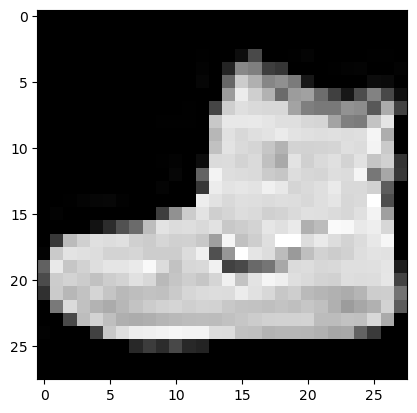

In [4]:
import matplotlib.pyplot as plt

plt.imshow(imagen_raw, cmap="gray")

Analizamos ahora la etiqueta

In [5]:
print(f"La etiqueta es de tipo: {type(etiqueta_raw)} y su valor es {etiqueta_raw}")

La etiqueta es de tipo: <class 'int'> y su valor es 9


Vamos ahora a descargarnos el dataset, pero aplicando trasnformaciones a las imágenes y a las etiquetas. Las imágenes las convertiremos a ``Tensor`` y las etiquetas las codificaremos como one-hot encoding

In [6]:
import torch
from torchvision.transforms import ToTensor, Lambda

dataset_transforms = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

Podemos ver que a las imágenes se le a aplicado la transformación ``ToTensor()``, lo que convertirá las imágenes a tensores.
[``ToTensor``](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor) convierte una imagen PIL o NumPy ``ndarray`` en un ``FloatTensor``, y escala los valores de intensidad de píxeles de la imagen en el rango [0., 1.]

Por otro lado a las etiquetas se les a aplicado una transformación ``Lambda``. Las transformaciones ``Lambda`` aplican cualquier función lambda definida por el usuario.
Aquí, definimos una función para convertir el número entero en un tensor codificado como one-hot encoding. Primero crea un tensor de ceros de tamaño 10 (el número de etiquetas en nuestro conjunto de datos) y llama a [``scatter_``](https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html), que asigna un value=1 en el índice que indique la etiqueta ``y``.

Cogemos una muestra de este dataset

In [7]:
imagen_transforms, etiqueta_transforms = dataset_transforms[0]

Analizamos la imagen

In [8]:
print(f"La imagen es de tipo: {type(imagen_transforms)}")
print(f"El tamaño de la imagen es de {imagen_transforms.shape}")
min_value = imagen_transforms.min()
max_value = imagen_transforms.max()
print(f"La imagen está codificada en píxeles de valor entre {min_value} y {max_value}")

La imagen es de tipo: <class 'torch.Tensor'>
El tamaño de la imagen es de torch.Size([1, 28, 28])
La imagen está codificada en píxeles de valor entre 0.0 y 1.0


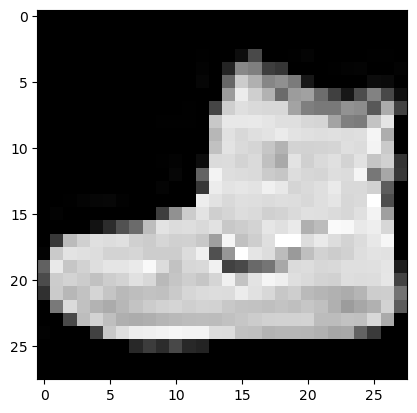

In [9]:
import matplotlib.pyplot as plt

plt.imshow(imagen_transforms.squeeze_(), cmap="gray")

# squeeze elimina todas las dimensiones 1 de un tensor, 
# si se le mete un tensor de dimensiones (Ax1xBxCx1xD) 
# devuelve un tensor de dimensiones (AxBxCxD)

Analizamos ahora la etiqueta

In [10]:
print(f"La etiqueta es de tipo: {type(etiqueta_transforms)} y su valor es {etiqueta_transforms}")

La etiqueta es de tipo: <class 'torch.Tensor'> y su valor es tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])
